In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [23]:
# Create a directed graph based on the Wikipedia tree decomposition example
# https://en.wikipedia.org/wiki/Tree_decomposition (the example graph is undirected, but we can use a directed version)

G = nx.DiGraph()

# Add 6 vertices
G.add_nodes_from(range(6))

# Add edges as in the Wikipedia example (undirected edges, so add both directions)
edges = [
    (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5)
]
# Add both directions to make it directed
edges_directed = [(u, v) for u, v in edges] + [(v, u) for u, v in edges]
G.add_edges_from(edges_directed)

for u, v in G.edges():
    G[u][v]['weight'] = random.randint(1, 10)


{(0, 1): Text(0.9009018563370278, -0.3229679173204031, '7'),
 (0, 2): Text(0.46093452222407133, -0.6731258496922724, '10'),
 (1, 2): Text(0.445641638728932, -0.1858256609626875, '5'),
 (1, 3): Text(0.46466293823031524, 0.39993621278266617, '7'),
 (1, 0): Text(0.9009018563370278, -0.3229679173204031, '3'),
 (2, 3): Text(0.02469560411735878, 0.04977828041079685, '4'),
 (2, 4): Text(-0.4227603081463989, -0.3535473045378813, '7'),
 (2, 0): Text(0.46093452222407133, -0.6731258496922724, '5'),
 (2, 1): Text(0.445641638728932, -0.1858256609626875, '2'),
 (3, 4): Text(-0.40373900864501566, 0.23221456920747235, '4'),
 (3, 5): Text(-0.478141548190629, 0.6765152218582839, '4'),
 (3, 1): Text(0.46466293823031524, 0.39993621278266617, '8'),
 (3, 2): Text(0.02469560411735878, 0.04977828041079685, '1'),
 (4, 5): Text(-0.9255974604543866, 0.27318963690960574, '2'),
 (4, 2): Text(-0.4227603081463989, -0.3535473045378813, '5'),
 (4, 3): Text(-0.40373900864501566, 0.23221456920747235, '5'),
 (5, 3): Text

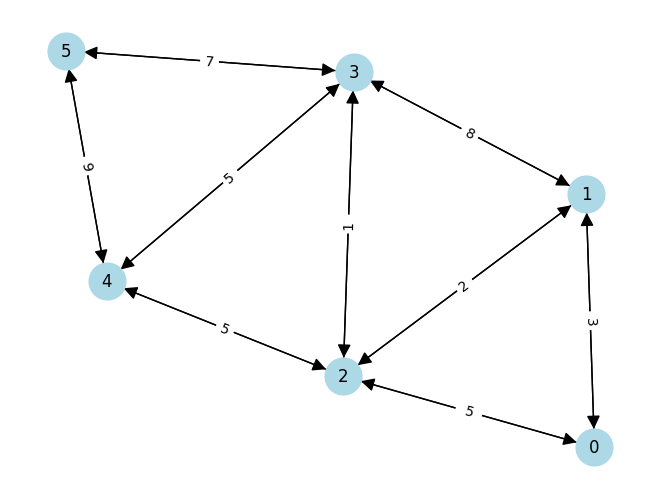

In [24]:
# Draw the graph
pos = nx.spring_layout(G, seed=42)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

In [25]:
# Convert to undirected graph for treewidth computation
G_undirected = G.to_undirected()
treewidth, T_G = nx.approximation.treewidth_min_fill_in(G_undirected)
print("Treewidth of the graph:", treewidth)

Treewidth of the graph: 2


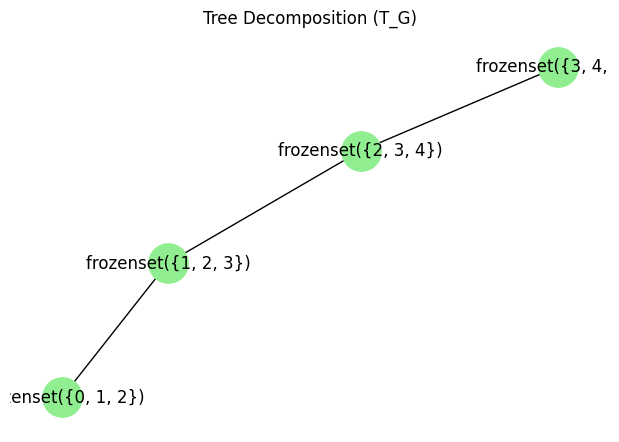

In [26]:
# Draw the tree decomposition graph T_G
plt.figure(figsize=(6, 4))
nx.draw(T_G, with_labels=True, node_color='lightgreen', node_size=800)
plt.title("Tree Decomposition (T_G)")
plt.show()